Problem Statement:

You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.
The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.


Essentially, the company wants —

- We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours.

- The client is particularly interested in customer segments and their chip purchasing behaviour.

- Consider what metrics would help describe the customers’ purchasing behaviour.  



Main tasks along with what we should be looking for in the data for each. 

Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 

Make sure you save your analysis in the CSV files and your visualisations – we will need them for our report. If you could work on this analysis and send me your initial findings by end of next week that would be great.  


You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.
The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

You have received the following email from your manager, Zilinka.

'Hi, 

Welcome again to the team, we love having new graduates join us! 

I just wanted to send a quick follow up from our conversation earlier with a few pointers around the key areas of this task to make sure we set you up for success. 

Below I have outlined your main tasks along with what we should be looking for in the data for each. 

Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 

Make sure you save your analysis in the CSV files and your visualisations – we will need them for our report. If you could work on this analysis and send me your initial findings by end of next week that would be great.  


We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

We have chosen to complete this task in R, however you will also find Python to be a useful tool in this piece of analytics. If you aren’t familiar with R or Python we would recommend searching a few online courses to help get you started. We have also provided an R solution template if you want some assistance in getting through this Task. Whilst its possible to complete the task in Excel you may find the size of the data and the nature of the tasks is such that it is more difficult to complete in Excel.  

To get started, download the resource csv data files below and begin performing high level data checks such as:

- Creating and interpreting high level summaries of the data
- Finding outliers and removing these (if applicable)
- Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

As we are in the early stages of this analysis Zilinka has asked us to submit our initial findings, so please save your code as a .pdf file and upload it to unlock the model answer.


# Importing and Understanding Transaction Data

In [1]:
import pandas as pd
import numpy as np
import re as re

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Housing.csv
#df = pd.read_csv("sample.csv", parse_dates=['column_name']
transaction_data = pd.read_csv("QVI_transaction_data.csv", parse_dates=['DATE'])

In [3]:
# Looking at the first five rows
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
# What type of values are stored in the columns?
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


### Data Preparation

- Convert DATE to pandas datetime format
- Extract packet weight in a different column from the product name
- Remove special characters '&' and '/'
- Remove packet weights from the product name
- Extract brand name from product name

***Convert datetime format***

In [6]:
# Converting date to Pandas datetime format


transaction_data['DateTime'] = pd.to_datetime(transaction_data['DATE'], unit='s')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DateTime
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1970-01-01 12:03:10
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,1970-01-01 12:06:39
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1970-01-01 12:06:45
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,1970-01-01 12:02:09
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1970-01-01 12:02:10


In [7]:
 transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  object        
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   DateTime        264836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 18.2+ MB


***Extract packet weight***

In [8]:
# Extract weights out of 'PROD_NAME'

def pkt_weight(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
transaction_data['pkt_weight']= transaction_data['PROD_NAME'].apply(lambda x: pkt_weight(x))


In [9]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DateTime,pkt_weight
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1970-01-01 12:03:10,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,1970-01-01 12:06:39,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1970-01-01 12:06:45,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,1970-01-01 12:02:09,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1970-01-01 12:02:10,150


***Remove special characters and product weight***

In [10]:
# Create text cleaning function for PROD_NAME feature
def clean_text(text):
    text = re.sub('[&/]', ' ', text) # remove special characters '&' and '/'
    text = re.sub('\d\w*', ' ', text) # remove product weights
    return text

# Apply text cleaning function to PROD_NAME column
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].apply(clean_text)

In [12]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DateTime,pkt_weight
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,1970-01-01 12:03:10,175
1,43599,1,1307,348,66,CCs Nacho Cheese,3,6.3,1970-01-01 12:06:39,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,1970-01-01 12:06:45,170
3,43329,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,1970-01-01 12:02:09,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,1970-01-01 12:02:10,150


***Extract brand name***

In [13]:
# Extract brand name from PROD_NAME and create new column called BRAND

part = transaction_data['PROD_NAME'].str.partition()
transaction_data['BRAND'] = part[0]
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DateTime,pkt_weight,BRAND
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,1970-01-01 12:03:10,175,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese,3,6.3,1970-01-01 12:06:39,175,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,1970-01-01 12:06:45,170,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,1970-01-01 12:02:09,175,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,1970-01-01 12:02:10,150,Kettle


### Check for missing values

- Find the numerical variables
- Find the categorical variables
- Check for missing values

***Missing values***

In [14]:
#check for missing values

transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
DateTime          0
pkt_weight        0
BRAND             0
dtype: int64

In [15]:
# Check the percentage of missing values in each variable

transaction_data.isnull().mean().sort_values(ascending=True)

DATE              0.0
STORE_NBR         0.0
LYLTY_CARD_NBR    0.0
TXN_ID            0.0
PROD_NBR          0.0
PROD_NAME         0.0
PROD_QTY          0.0
TOT_SALES         0.0
DateTime          0.0
pkt_weight        0.0
BRAND             0.0
dtype: float64

***Categorical variables***

In [18]:
# find categorical variables

cat_cols = [c for c in transaction_data.columns if transaction_data[c].dtypes=='O']
print(cat_cols)

transaction_data[cat_cols].isnull().mean().sort_values()

['DATE', 'PROD_NAME', 'pkt_weight', 'BRAND']


DATE          0.0
PROD_NAME     0.0
pkt_weight    0.0
BRAND         0.0
dtype: float64

***Numerical variables***

In [21]:
# find numerical variables

num_cols = [c for c in transaction_data.columns if transaction_data[c].dtypes!='O']
print(num_cols)

transaction_data[num_cols].isnull().mean().sort_values()

['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES', 'DateTime']


STORE_NBR         0.0
LYLTY_CARD_NBR    0.0
TXN_ID            0.0
PROD_NBR          0.0
PROD_QTY          0.0
TOT_SALES         0.0
DateTime          0.0
dtype: float64

### Unique values

- Check unique values for PKT_WEIGHT
- Check unique values for BRAND

***unique values for PKT_WEIGHT***

In [22]:
#Count the number of uniques values in each column

transaction_data.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
DateTime             364
pkt_weight            21
BRAND                 29
dtype: int64

In [23]:
transaction_data['pkt_weight'].unique()

array(['175', '170', '150', '300', '330', '210', '270', '220', '125',
       '110', '134', '380', '180', '165', '135', '250', '200', '160',
       '190', '90', '70'], dtype=object)

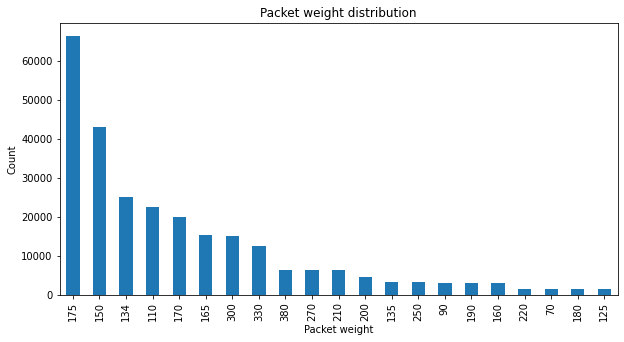

In [31]:
# Check the distribution of PACKET WEIGHT

plt.figure(figsize = (10, 5))
transaction_data['pkt_weight'].value_counts().plot.bar()
plt.title("Packet weight distribution")
plt.xlabel("Packet weight")
plt.ylabel("Count")
plt.show()

***unique values for BRAND***

In [26]:
transaction_data['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [27]:
# Rename brand names for consistency

transaction_data['BRAND'].replace('Ncc', 'Natural', inplace = True)
transaction_data['BRAND'].replace('Ccs', 'CCS', inplace = True)
transaction_data['BRAND'].replace('Smith', 'Smiths', inplace = True)
transaction_data['BRAND'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
transaction_data['BRAND'].replace('Dorito', 'Doritos', inplace = True)
transaction_data['BRAND'].replace('Ww', 'Woolworths', inplace = True)
transaction_data['BRAND'].replace('Infzns', 'Infuzions', inplace = True)
transaction_data['BRAND'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
transaction_data['BRAND'].replace('Snbts', 'Sunbites', inplace = True)

transaction_data['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grainwaves',
       'Doritos', 'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'GrnWves', 'Tyrrells',
       'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Sunbites'], dtype=object)

In [28]:
# Which brand had the most sales?

transaction_data.groupby('BRAND').TOT_SALES.sum().sort_values(ascending = False)

BRAND
Kettle           390239.8
Doritos          241890.9
Smiths           224660.2
Pringles         177655.5
Infuzions         99047.6
Old               90785.1
Thins             88852.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
RRD               64954.5
Tyrrells          51647.4
Grainwaves        43048.8
Cheezels          40029.9
WW                35889.5
Natural           34272.0
Red Rock Deli     30091.5
CCs               18078.9
Cheetos           16884.5
Woolworths        13454.1
Sunbites           9676.4
GrnWves            8568.4
NCC                8046.0
French             7929.0
Burger             6831.0
Name: TOT_SALES, dtype: float64

### Outliers trimming

<AxesSubplot:ylabel='TOT_SALES'>

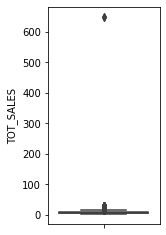

In [32]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=transaction_data['TOT_SALES'])

In [33]:
def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [34]:
# find limits for total sales

total_sales_upper_limit, total_sales_lower_limit = find_boundaries(transaction_data, 'TOT_SALES', 1.5)
total_sales_upper_limit, total_sales_lower_limit

(14.899999999999999, -0.29999999999999805)

In [35]:
# let's flag the outliers in the data set

outliers_total_sales = np.where(transaction_data['TOT_SALES'] > total_sales_upper_limit, True,
                       np.where(transaction_data['TOT_SALES'] < total_sales_lower_limit, True, False))

In [38]:
# let's trimm the dataset only of outliers in RM

data_trimmed = transaction_data.loc[~outliers_total_sales ]

transaction_data.shape, data_trimmed.shape

((264836, 11), (264258, 11))

<AxesSubplot:ylabel='TOT_SALES'>

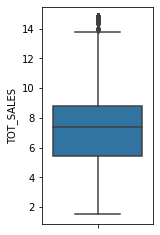

In [37]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data_trimmed['TOT_SALES'])

# Importing and Understanding Customer Data

In [39]:
# Importing Customer data.csv
customer_data = pd.read_csv("QVI_purchase_behaviour.csv")


In [40]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [41]:
# What type of values are stored in the columns?
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### Check for missing values

- Find the numerical variables
- Find the categorical variables
- Check for missing values

In [42]:
#check for missing values

customer_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [43]:
# find categorical variables

cat_cols = [c for c in customer_data.columns if customer_data[c].dtypes=='O']
print(cat_cols)

customer_data[cat_cols].isnull().mean().sort_values()

['LIFESTAGE', 'PREMIUM_CUSTOMER']


LIFESTAGE           0.0
PREMIUM_CUSTOMER    0.0
dtype: float64

In [44]:
# find numerical variables

num_cols = [c for c in customer_data.columns if customer_data[c].dtypes!='O']
print(num_cols)

customer_data[num_cols].isnull().mean().sort_values()

['LYLTY_CARD_NBR']


LYLTY_CARD_NBR    0.0
dtype: float64

### Unique values

- Check unique values for Premium customer
- Check unique values for Lifestage

In [45]:
#Count the number of uniques values in each column

customer_data.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [46]:
customer_data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [47]:
customer_data['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [48]:
# Value counts for lifestages

customer_data['LIFESTAGE'].value_counts().sort_values(ascending = False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

<AxesSubplot:xlabel='count', ylabel='LIFESTAGE'>

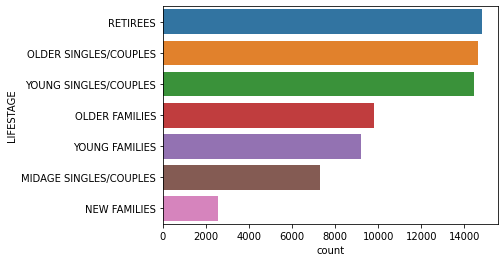

In [49]:
sns.countplot(y = customer_data['LIFESTAGE'], order = customer_data['LIFESTAGE'].value_counts().index)

In [50]:
# Value counts for each premium customer category

customer_data['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending = False)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

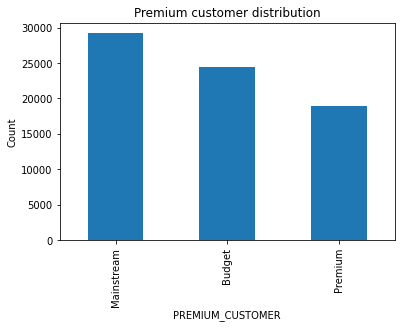

In [51]:
customer_data['PREMIUM_CUSTOMER'].value_counts().plot.bar()
plt.title("Premium customer distribution")
plt.xlabel("PREMIUM_CUSTOMER")
plt.ylabel("Count")
plt.show()

# Merge transaction data and Customer data

In [52]:
# Merge transactionData and customerData together

combined_data = pd.merge(transaction_data, customer_data)

In [53]:
print("Transaction data shape: ", transaction_data.shape)
print("Customer data shape: ", customer_data.shape)
print("Combined data shape: ", combined_data.shape)

Transaction data shape:  (264836, 11)
Customer data shape:  (72637, 3)
Combined data shape:  (264836, 13)


### Check for missing values

In [54]:
#check for missing values

combined_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
DateTime            0
pkt_weight          0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [55]:
combined_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DateTime,pkt_weight,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,1970-01-01 12:03:10,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese,3,6.3,1970-01-01 12:06:39,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips,2,3.8,1970-01-01 12:03:34,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original,1,2.1,1970-01-01 12:05:33,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,1970-01-01 12:06:45,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


# Data analysis and customer segments

In [57]:
# Total sales by PREMIUM_CUSTOMER and LIFESTAGE

sales = pd.DataFrame(combined_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
sales.sort_values(by = 'Total Sales', ascending = False, inplace = True)
sales

Total Sales
PREMIUM_CUSTOMER LIFESTAGE                          
Budget           OLDER FAMILIES            168363.25
Mainstream       YOUNG SINGLES/COUPLES     157621.60
                 RETIREES                  155677.05
Budget           YOUNG FAMILIES            139345.85
                 OLDER SINGLES/COUPLES     136769.80
Mainstream       OLDER SINGLES/COUPLES     133393.80
Premium          OLDER SINGLES/COUPLES     132263.15
Budget           RETIREES                  113147.80
Mainstream       OLDER FAMILIES            103445.55
Premium          RETIREES                   97646.05
Mainstream       YOUNG FAMILIES             92788.75
                 MIDAGE SINGLES/COUPLES     90803.85
Premium          YOUNG FAMILIES             84025.50
                 OLDER FAMILIES             81958.40
Budget           YOUNG SINGLES/COUPLES      61141.60
Premium          MIDAGE SINGLES/COUPLES     58432.65
                 YOUNG SINGLES/COUPLES      41642.10
Budget           MIDAGE SINGLES/COUPLES     35514.80
                 NEW FAMILIES               21928.45
Mainstream       NEW FAMILIES               17013.90
Premium          NEW FAMILIES               11491.10

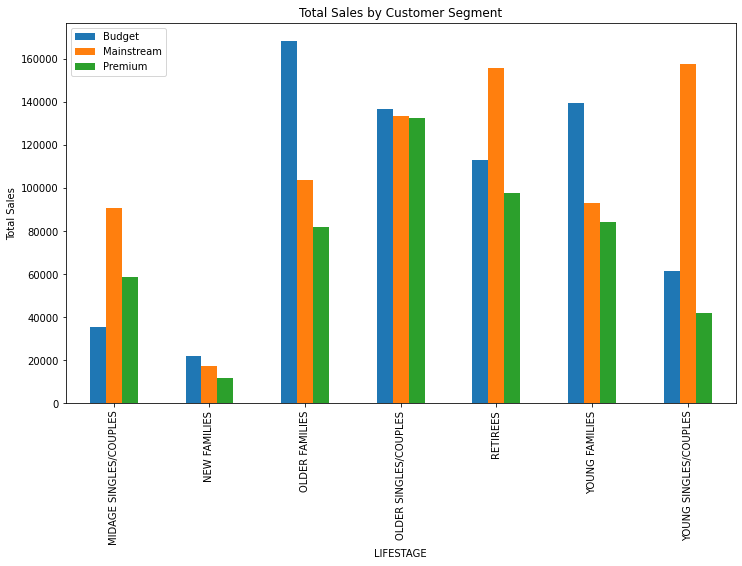

In [58]:
# Visualise

salesPlot = pd.DataFrame(combined_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [67]:
# Average price per unit by PREMIUM_CUSTOMER and LIFESTAGE

avg_price = combined_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / combined_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns = {'Price per Unit'})
avg_price.sort_values(by = 'Price per Unit', ascending = False).head()

Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.080079
                 MIDAGE SINGLES/COUPLES        4.000346
                 NEW FAMILIES                  3.939315
Budget           NEW FAMILIES                  3.936178
                 RETIREES                      3.933660

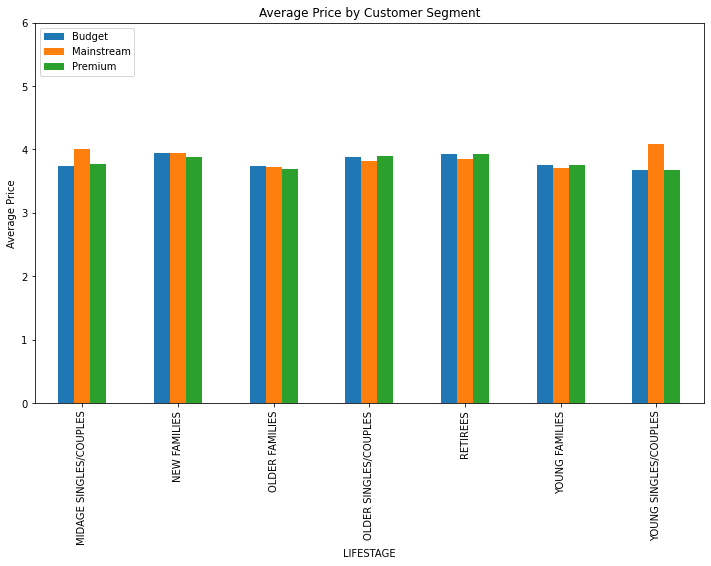

In [68]:
# Visualise 

avgPricePlot = pd.DataFrame(combined_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum() / combined_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum())
avgPricePlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Price by Customer Segment', ylim = (0, 6))
plt.ylabel('Average Price')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [ ]:
# Perform an independent t-test between mainstream vs non-mainstream midage and young singles/couples to test this difference

# Create a new dataframe pricePerUnit
pricePerUnit = combineData

# Create a new column under pricePerUnit called PRICE
pricePerUnit['PRICE'] = pricePerUnit['TOT_SALES'] / pricePerUnit['PROD_QTY']

# Let's have a look
pricePerUnit.head()
Out[73]:


In [59]:
# Number of customers by PREMIUM_CUSTOMER and LIFESTAGE

customers = pd.DataFrame(combined_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False).head(10)

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 8088
                 RETIREES                              6479
                 OLDER SINGLES/COUPLES                 4930
Budget           OLDER SINGLES/COUPLES                 4929
Premium          OLDER SINGLES/COUPLES                 4750
Budget           OLDER FAMILIES                        4675
                 RETIREES                              4454
                 YOUNG FAMILIES                        4017
Premium          RETIREES                              3872
Budget           YOUNG SINGLES/COUPLES                 3779

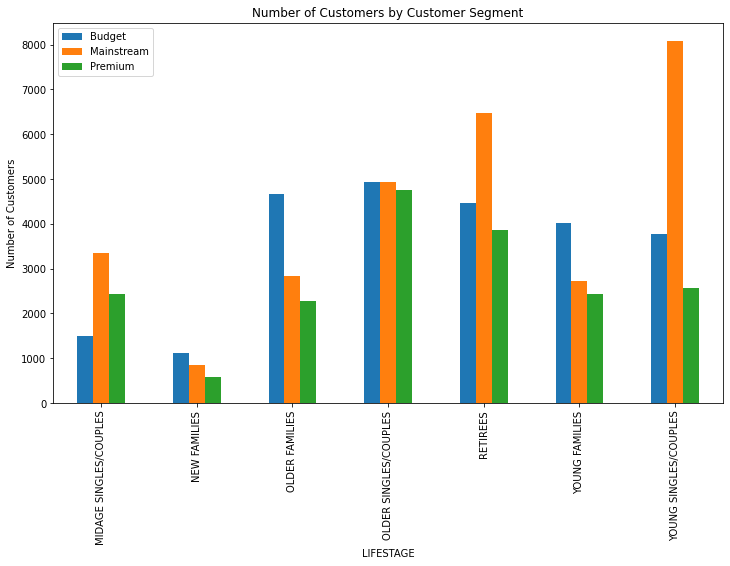

In [61]:
# Visualise

customersPlot = pd.DataFrame(combined_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customersPlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [63]:
# Average units per customer by PREMIUM_CUSTOMER and LIFESTAGE

avg_units = combined_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / combined_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by = 'Average Unit per Customer', ascending = False).head()

Average Unit per Customer
PREMIUM_CUSTOMER LIFESTAGE                                
Mainstream       OLDER FAMILIES                   9.804309
Premium          OLDER FAMILIES                   9.749780
Budget           OLDER FAMILIES                   9.639572
                 YOUNG FAMILIES                   9.238486
Premium          YOUNG FAMILIES                   9.209207

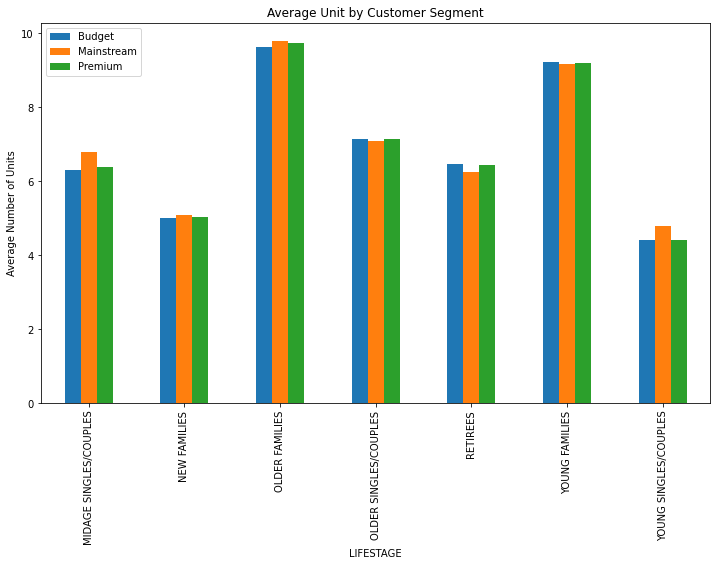

In [65]:
# Visualise 

avgUnitsPlot = pd.DataFrame(combined_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / combined_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
avgUnitsPlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)